# Course assignment for "Praktyczny Machine Learning w Pythonie"
__Authors__: Hubert Wojewoda, Andrzej Żernaczuk, Piotr Radziszewski

__Github__: https://github.com/hoobys/projekt_ml
### Contents: 
1. Data description
2. Data engineering 
3. Models and results
4. Results
5. Conclusions


# 1. Data description

### 1.1. Data Source

Data: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/metadata?resource=download

### 1.2 Variables


__RainTomorrow__ is the target variable to predict. The amount of next day rain in mm. Used to create response variable RainTomorrow. It means: did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.


Explanatory variables:


__Date__ - The date of observation

__Location__ - The common name of the location of the weather station 

__MinTemp__ - The minimum temperature in degrees celsius

__MaxTemp__ - The maximum temperature in degrees celsius

__Rainfall__ - The amount of rainfall recorded for the day in mm

__Evaporation__ - The so-called Class A pan evaporation (mm) in the 24 hours to 9am

__Sunshine__ - The number of hours of bright sunshine in the day.

__WindGustDir__ - The direction of the strongest wind gust in the 24 hours to midnight

__WindGustSpeed__ - The speed (km/h) of the strongest wind gust in the 24 hours to midnight

__WindDir9am__ - Direction of the wind at 9am

__WindDir3pm__ - Direction of the wind at 3pm

__WindSpeed9am__ - Wind speed (km/hr) averaged over 10 minutes prior to 9am

__WindSpeed3pm__ - Wind speed (km/hr) averaged over 10 minutes prior to 3pm

__Humidity9am__ - Humidity (percent) at 9am

__Humidity3pm__ - Humidity (percent) at 3pm

__Pressure9am__ - Atmospheric pressure (hpa) reduced to mean sea level at 9am

__Pressure3pm__ - Atmospheric pressure (hpa) reduced to mean sea level at 3pm

__Cloud9am__ - Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many

__Cloud3pm__ - Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values

__Temp9am__ - Temperature (degrees C) at 9am

__Temp3pm__ - Temperature (degrees C) at 3pm

__RainToday__ - Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0


### 1.3 Data exploration

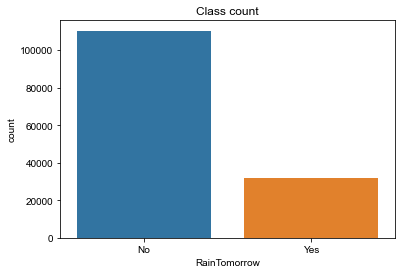

In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
raw_data = pd.read_csv("weatherAUS.csv")
features = raw_data.columns.tolist()
features.remove('RainTomorrow')
sns.countplot(x=raw_data['RainTomorrow'])
sns.set(rc={'figure.figsize':(15, 10)})
plt.title('Class count')
plt.show()

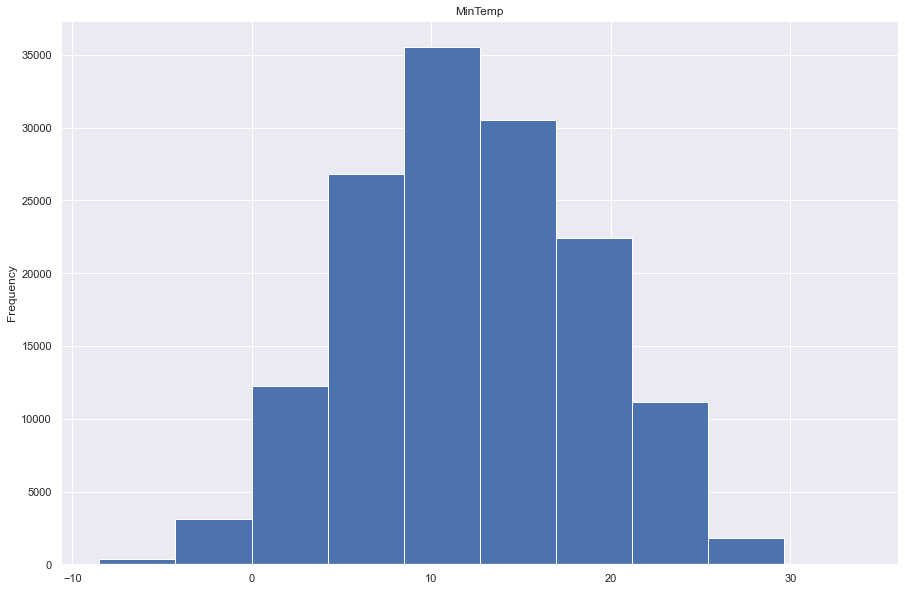

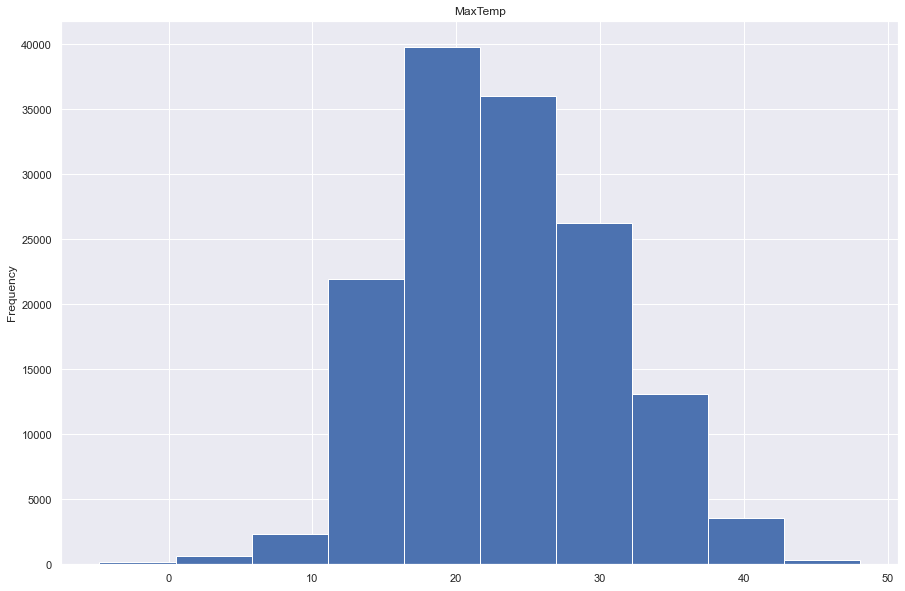

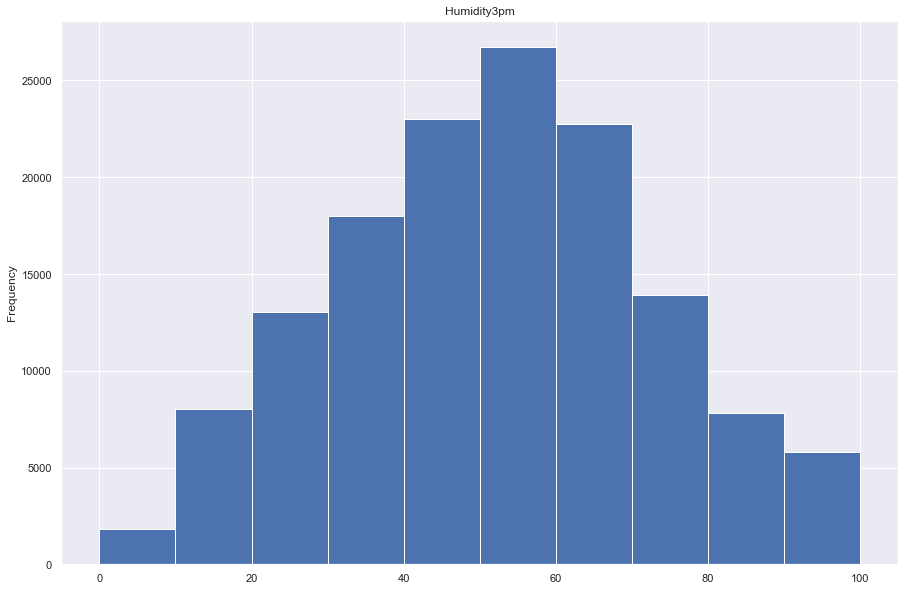

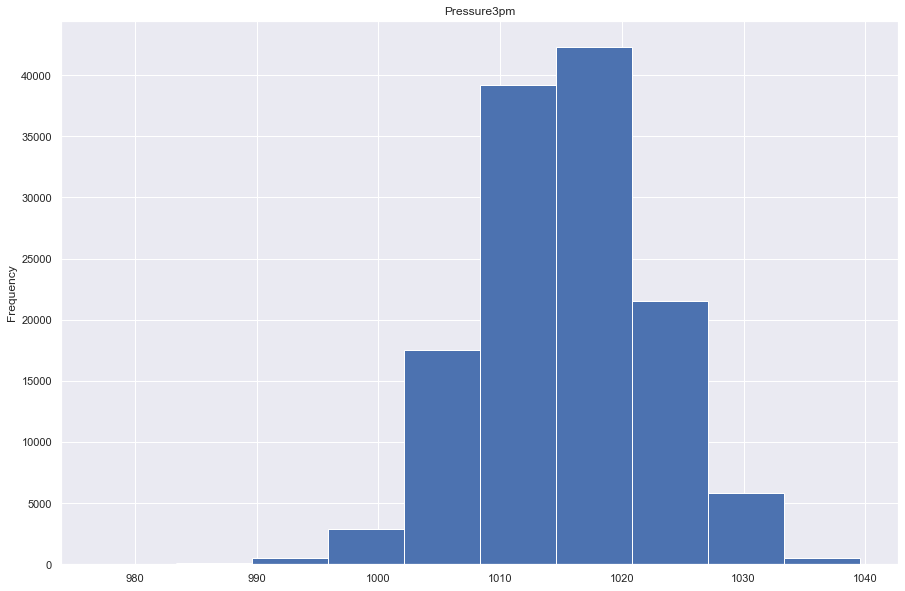

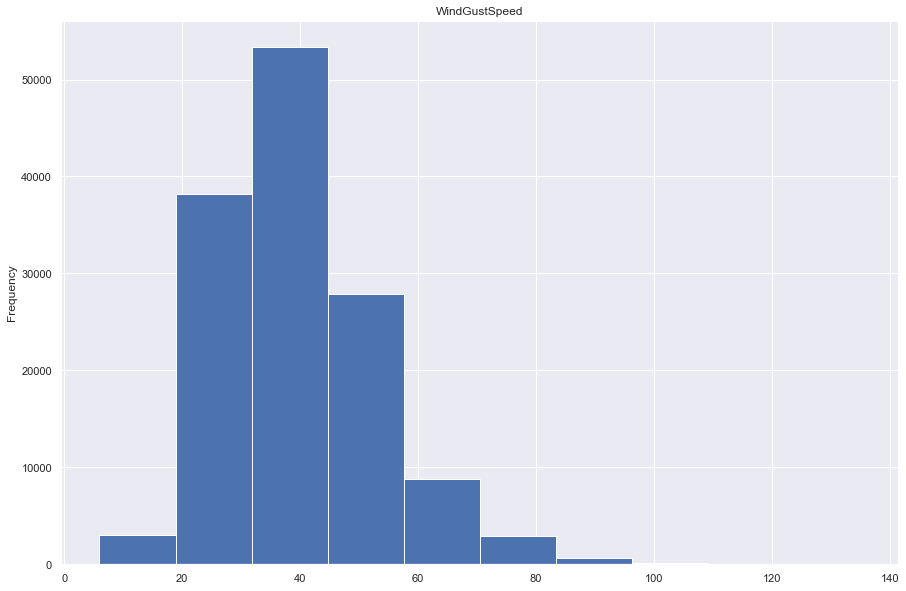

In [2]:
for col in ['MinTemp', 'MaxTemp', 'Humidity3pm', 'Pressure3pm', 'WindGustSpeed']:
    raw_data[col].plot.hist(bins=10)
    plt.title(col)
    plt.show()

# 2 Data engineering
1. Raw data was taken from kaggle (saved as __weatherAUS.csv__) and then passed to data frame
2. One Hot Encoding of Location and Winds columns
3. Missing numerical features were replaced with the median of that feature
4. Cities names changed to geographic coordinates (latitude, longitude)
5. Grouping months into year seasons 
6. Added variables winterRain, summerRain, springRain, autumnRain - which indicate season and if it rained that day
7. Performed feature selection in three different ways
    - XGBoost feature importance
    - Mutual information
    - Forward selection using linear regression
8. We ended up with a final dataset consisting of 123710 observaions and 31 columns (including target)
9. The selected features were:
    - MinTemp
    - MaxTemp
    - Rainfall
    - Evaporation
    - Sunshine
    - WindGustSpeed
    - WindSpeed9am
    - WindSpeed3pm
    - Humidity9am
    - Humidity3pm
    - Pressure9am
    - Pressure3pm
    - Cloud9am
    - Cloud3pm
    - Temp9am
    - Temp3pm
    - RainToday
    - Year
    - Month
    - Day
    - __winter__
    - __spring__
    - __summer__
    - __autumn__
    - __winterRain__
    - __springRain__
    - __summerRain__
    - __autumnRain__
    - __latitude__
    - __longitude__
    - RainTomorrow (target)


# 3. Models
### 3.1 Linear Regression
- Base model
- No hyperparameter tuning
- ROC_AUC: 0.874
    
### 3.2 KNN 
- Second slowest
- Hyperparameter tuning - random search:  
    1. n_neighbours  
    2. p
- ROC_AUC: 0.886
    
### 3.3 SVM
- Slowest model
- Witout sampling training would take too long
- Hyperparameter tuning not possible due to training speed
- ROC_AUC: 0.853
 
### 3.4 Random Forest
- Fast model
- Some problems with overfitting
- Hyperparameter tuning - random search:  
    1. max_depth
    2. n_estimators
    3. max_features
    4. min_samples_split
    5. min_samples_leaf
- ROC_AUC: 0.892
    
### 3.5 XGBoost 
- Fastest model
- Hyperparameter tuning - random search:  
    1. max_depth
    2. subsample
    3. colsample_bytree
    4. lambdaX
    5. gamma
- ROC_AUC: 0.906
    
### 3.6 Neural Networks
- Somewhat slow
- Scaled data
- Hyperparameter tuning - random search:  
    1. number of layers
    2. optimization function 
    3. activation function 
    4. number of nodes in each layer
    5. dropout rate
    6. batch size
    7. dropout on all layers (true/false)
- ROC_AUC: 0.906


In [3]:
def heatmap(results):
    from sklearn.metrics import confusion_matrix

    for true, pred, label in results:
        cm = confusion_matrix(true, pred)

        plt.style.use('fivethirtyeight')
        plt.figure(figsize=(7,5))
        sns.heatmap(cm, annot=True, fmt='d')
        plt.xlabel("Predicted")
        plt.ylabel("Truth")
        plt.title(label)

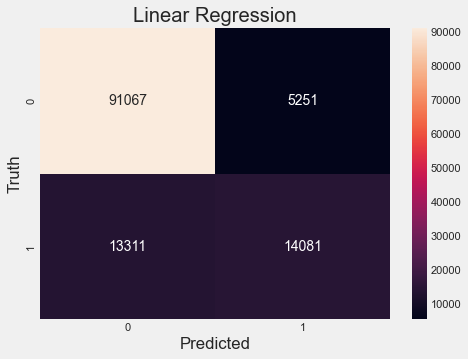

In [15]:

res = []
# Tworzymy wektor predykcji tworząc serię pandasa, a następnie sortujemy indeks
pred = pd.Series(sum(modelLR["predictions"], []), index=sum(modelLR["indices"], [])).sort_index()
pred = pred > 0.5
res.append((true, pred, modelLR["name"]))
    

heatmap(res)

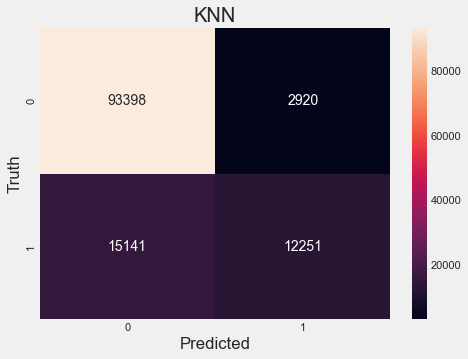

In [16]:

res = []
# Tworzymy wektor predykcji tworząc serię pandasa, a następnie sortujemy indeks
pred = pd.Series(sum(modelkNN["predictions"], []), index=sum(modelkNN["indices"], [])).sort_index()
pred = pred > 0.5
res.append((true, pred, modelkNN["name"]))
    

heatmap(res)

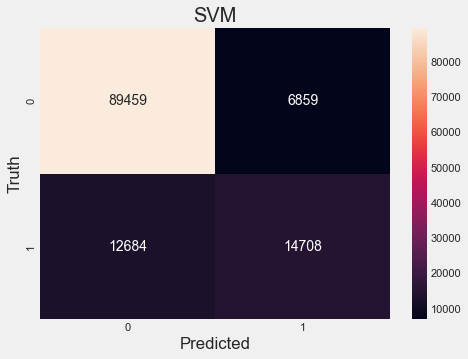

In [17]:

res = []
# Tworzymy wektor predykcji tworząc serię pandasa, a następnie sortujemy indeks
pred = pd.Series(sum(modelSVM["predictions"], []), index=sum(modelSVM["indices"], [])).sort_index()
pred = pred > 0.5
res.append((true, pred, modelSVM["name"]))
    

heatmap(res)

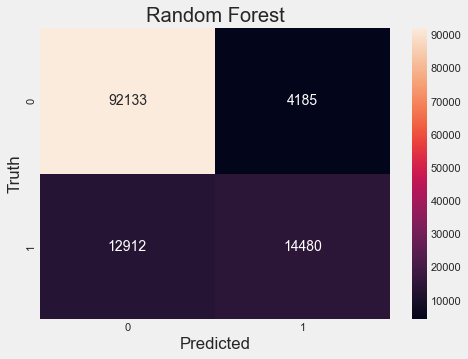

In [18]:

res = []
# Tworzymy wektor predykcji tworząc serię pandasa, a następnie sortujemy indeks
pred = pd.Series(sum(modelRF["predictions"], []), index=sum(modelRF["indices"], [])).sort_index()
pred = pred > 0.5
res.append((true, pred, modelRF["name"]))
    

heatmap(res)

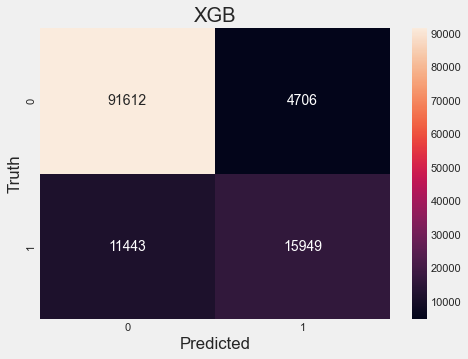

In [19]:
res = []
# Tworzymy wektor predykcji tworząc serię pandasa, a następnie sortujemy indeks
pred = pd.Series(sum(modelXGB["predictions"], []), index=sum(modelXGB["indices"], [])).sort_index()
pred = pred > 0.5
res.append((true, pred, modelXGB["name"]))
    

heatmap(res)

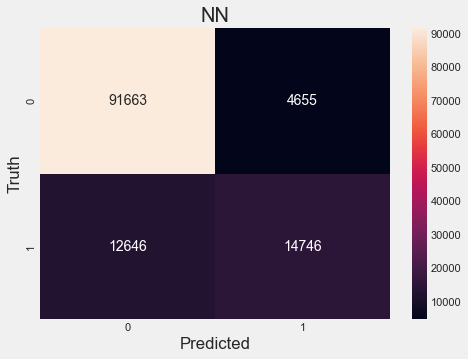

In [20]:

res = []
# Tworzymy wektor predykcji tworząc serię pandasa, a następnie sortujemy indeks
pred = pd.Series(sum(modelNN["predictions"], []), index=sum(modelNN["indices"], [])).sort_index()
pred = pred > 0.5
res.append((true, pred, modelNN["name"]))
    

heatmap(res)

 # 4. Results

In [10]:
import pickle

# Wczytajmy też wcześniej zapisane modele
with open("result_LR.p", "rb") as fp:
    modelLR = pickle.load(fp)
    
with open("result_NN.p", "rb") as fp:
    modelNN = pickle.load(fp)

with open("result_KNN.p", "rb") as fp:
    modelkNN = pickle.load(fp)

with open("result_XGB.p", "rb") as fp:
    modelXGB = pickle.load(fp)

with open("result_SVM.p", "rb") as fp:
    modelSVM = pickle.load(fp)
        
with open("result_RF.p", "rb") as fp:
    modelRF = pickle.load(fp)

In [11]:
df = pd.read_csv("weatherAUS_clean.csv")
target = "RainTomorrow"

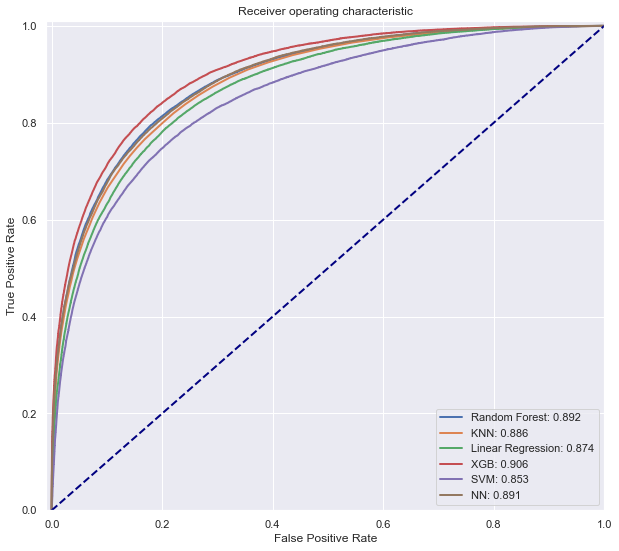

In [12]:
from helpers import plotROCs

res2plot = []
true = (df[target]).astype(int).sort_index()
for result in [modelRF, modelkNN, modelLR, modelXGB, modelSVM, modelNN]:
    # Tworzymy wektor predykcji tworząc serię pandasa, a następnie sortujemy indeks
    pred = pd.Series(sum(result["predictions"], []), index=sum(result["indices"], [])).sort_index()
    res2plot.append((true, pred, result["name"]))
    
# Wywołujemy funkcję do rysowania
plotROCs(res2plot)

In [13]:
results = {
    'SVM': 0.853, 
    'Linear Regression': 0.874,
    'KNN': 0.886,
    'Neural Networks': 0.891,
    'Random Forest': 0.892,
    'XGBoost': 0.906,
}
results_df = pd.DataFrame(data=results, index=[0])

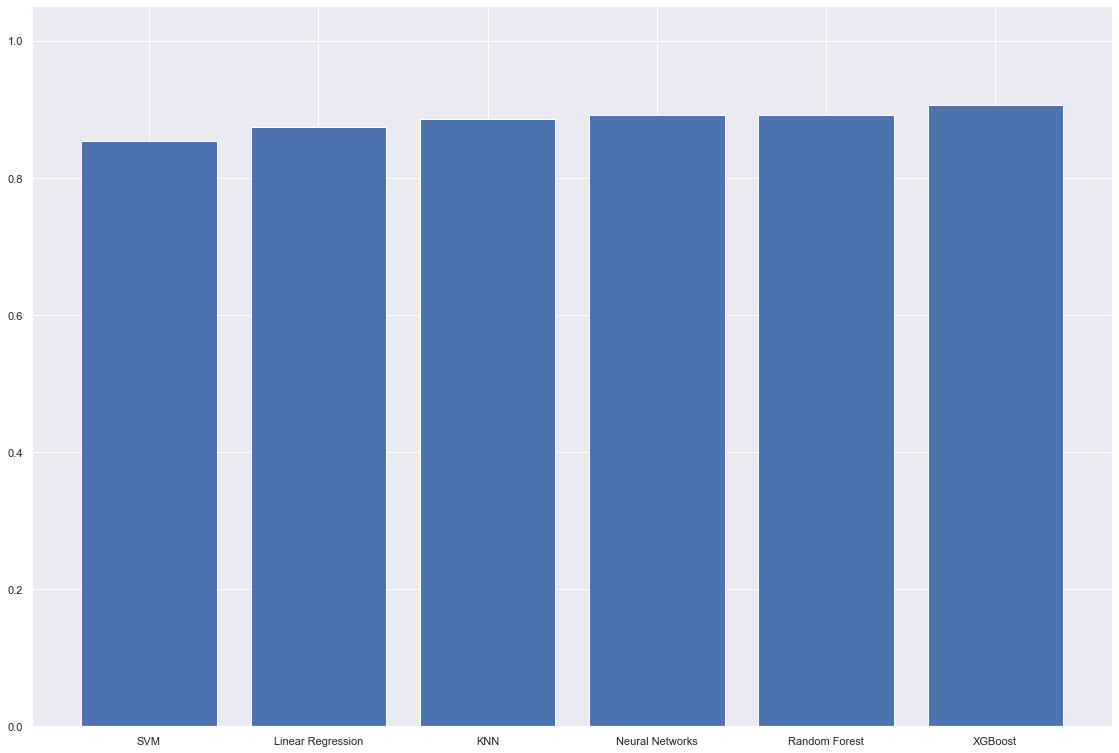

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.ylim([0, 1.05])
ax.bar(results_df.columns.tolist(), results_df.values.tolist()[0])
plt.show()

# 5. Conclusions
- Interesting dataset
- Very good linear regression AUC score
- XGBoost managed to get the best predictions
- Neural Networks didn't perform as good as tree based algorithms
- Not many linear dependencies
- Few interactions between variables